# 数据可视化matplotlib、seaborn


## 一、表格的数据结构规范

### 表格中的内容需要确保利于数据筛选。
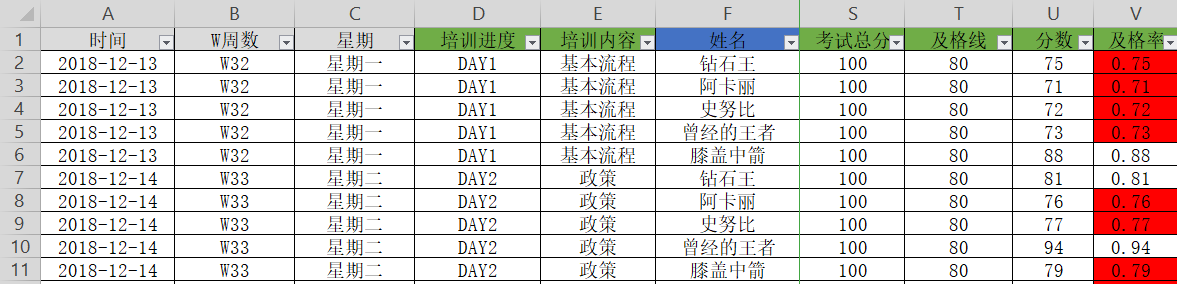


### 这种格式处理难度比较大，需要通过删除多余行的方法处理，但是会丢失掉一些信息，实际测试中也碰到了各种问题，所以请尽量避免。
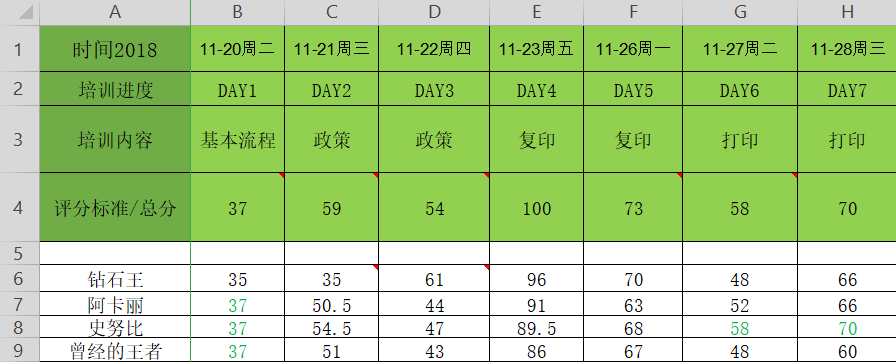


## 二、库的安装
### cmd窗口运行python -m pip install -U matplotlib 等待安装完成。

## 三、文件的读取
### （一）xlsx文件另存为utf-8编码的csv文件
 * 该功能虽然通过pandas实现，但依赖于xlrd库。
 * 参考文档：https://blog.csdn.net/qq_33689414/article/details/78307031

In [1]:
import pandas as pd
#xlsx文件转化成csv文件
def xlsx_to_csv_pd(original_file):
    data_xls = pd.read_excel(original_file)
    new_file=original_file[0:original_file.rfind('.')]+'_copy.xlsx'
    data_xls.to_csv(r'file/matplotlib/handel.csv', encoding='utf-8')

file_path=r'D:\design\python\考试成绩可视化2\员工综合素质评价表.xlsx'
#xlsx_to_csv_pd(file_path)#读取csv文件
#------------------------------------------------------------------
#如果直接读xlsx文件，需要要指定工作表名称
csv=pd.read_excel(file_path,sheet_name='新版综合评价')


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\design\\python\\考试成绩可视化2\\员工综合素质评价表.xlsx'

##  四、数据可视化
### （一）直方图
####    1.直方图的基本代码
* 函数：
        sns.barpot()#设置为直方图
* 显示中文：
        plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
        plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
        sns.set(font='SimHei')  # 解决Seaborn中文显示问题

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#下面的代码在python中是不需要的
%matplotlib inline 

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')# 解决Seaborn中文显示问题

csv=pd.read_csv(r'file/matplotlib/handel.csv')
#print(csv.head())#打印表格
sns.barplot(x='姓名',y='分数',data=csv)#orient='h'水平展示，记得要对换x和y；
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'file/matplotlib/handel.csv'

#### 2.设置轴坐标刻度
##### （1）设置Y轴刻度
* 参考文档：https://blog.csdn.net/ohcezzz/article/details/80677616
* 函数：

        ticks = np.linspace(0,100,6)#设置0到100的值，分成6个刻度
        plt.yticks(ticks)#x轴应该就设置plt.xticks(ticks)，未做确认。

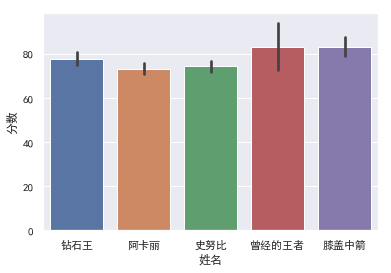

In [5]:
import numpy as np
ticks = np.linspace(0,100,6)#设置0到100的值，分成6个刻度
plt.yticks(ticks)

sns.barplot(x='姓名',y='分数',data=csv)
plt.show()

##### (3)将Y轴刻度完整显示/只显示其中一部分
*函数： 
    
        plt.ylim((0,100))

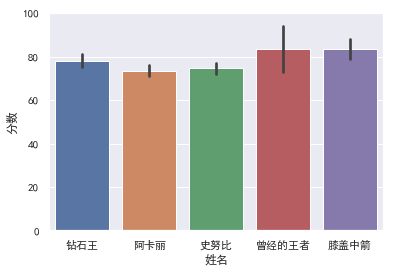

In [6]:
#显示0到100中的所有刻度
plt.ylim((0,100))

sns.barplot(x='姓名',y='分数',data=csv)
plt.show()

##### （3）将刻度变为中文

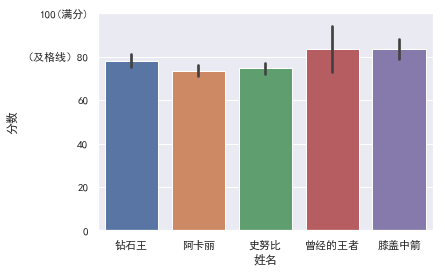

In [7]:
#显示0到100中的所有刻度
plt.ylim((0,100))
# 1.数组中设置每一个y轴刻度；2.对应上一个数组设置更换的内容。PS:如果有空格请输入“\”。
plt.yticks([0,20,40,60,80,100],
           [0,20,40,60,'（及格线）80',r'100(满分)'])

sns.barplot(x='姓名',y='分数',data=csv)
plt.show()

#### 3.设置数据条
##### （1）去掉数据条头上的黑线
        * 黑线为误差线，显示的是均值的标准误差。这个怎么算的尚未研究。
        * 与黑线有关的参数：
                    ci:未确认参数当ci小于20误差线不会显示。或
                    errwidth：误差线的宽度。当errwidth为0时误差线不会显示。errwidth是，放到以后研究。
                    capsize：黑线变成工字形。常用值为.2

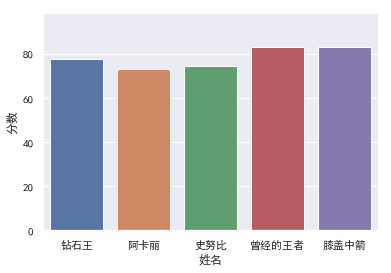

In [8]:
sns.barplot(x='姓名',y='分数',data=csv,errwidth=0)#errwidth=0去黑线
plt.show()

##### （2）多数据条显示
* 多数据显示没有黑线条？
* 相关参数：

        hue：字符串。需要多数据显示的列。
        hue_order:数组。多条数据按照数组内的顺序显示。
        dodge：默认为True。False时不改变杆的位置或宽度。官网文档中设置后每个数据条都是单独显示的，但是我的数据源设置后会变得很奇葩。。
    

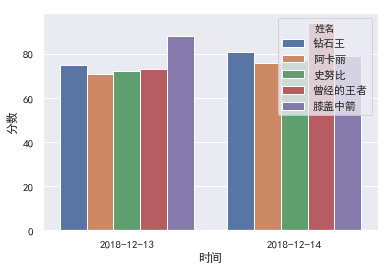

In [9]:
sns.barplot(x='时间',y='分数',hue='姓名',data=csv)#加入hue=列名，一组中显示多个数据
plt.show()

#### （2）改变数据顺序

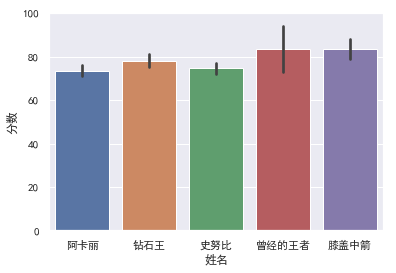

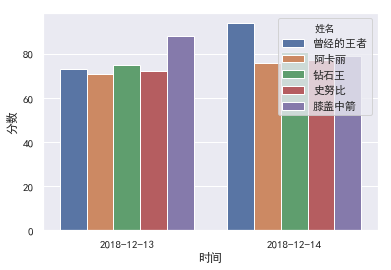

In [10]:
#显示0到100中的所有刻度
plt.ylim((0,100))

sns.barplot(x='姓名',y='分数',data=csv,order=["阿卡丽", "钻石王", "史努比", "曾经的王者", "膝盖中箭"])# order=[]改变x轴顺序，order参数
plt.show()
sns.barplot(x='时间',y='分数',hue="姓名",hue_order=["曾经的王者", "阿卡丽", "钻石王", "史努比", "膝盖中箭"],data=csv)
plt.show()

##### （3）如何将右上角的注释框移动到其它位置
* 未找到具体参数，应该是无法通过具体参数移动的。
* 但可以参考下面的设置画布大小。设置宽高到在一定程度后，会自动跑到空余的地方。。

##### （4）使用catplot()结合一barplot()和FacetGrid
* 参数：
        aspect ：设置宽度，设置后两个数据表中间会有间隔
        height：高度。

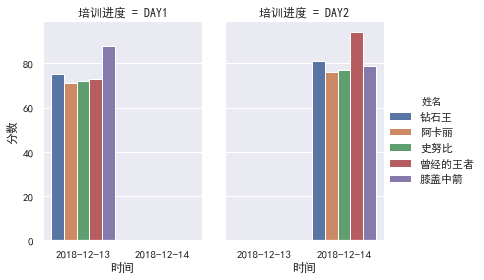

In [11]:
g = sns.catplot(x="时间", y="分数",hue="姓名", col="培训进度",
                 data=csv, kind="bar",height=4,aspect=0.7)
plt.show()

##### （3）横向显示
* 请注意：x和y的数据需要对调！（如果x的数据是数字，y的数据是字符串会自动变成横向）

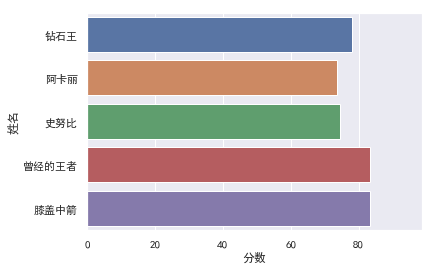

In [12]:
sns.barplot(x='分数',y='姓名',data=csv,errwidth=0,orient='h')#orient='h'为横向，v为纵向（默认为v）

plt.show()

#### 3.更改画布大小、设置标题
* 更改画布大小plt.figure(figsize=(宽,高))
* barplot参数中貌似没有height和width，提示没有定义..

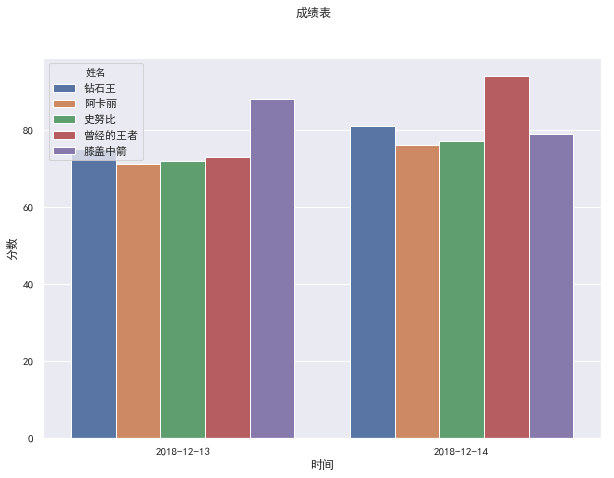

In [13]:
#设置画布大小
fig=plt.figure(figsize=(10,7))#figsize=(宽，高)
#加上大标题
fig.suptitle('成绩表',fontsize=12,fontweight='bold')


sns.barplot(x="时间",y='分数',hue='姓名',data=csv)
plt.show()

多图显示
参考文档：https://www.jianshu.com/p/67f4fbf7b4a3

#### 4.直方图调色板的选择

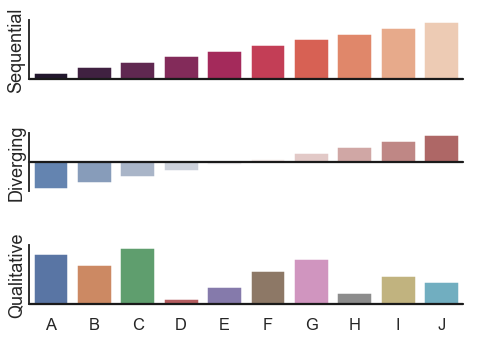

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

plt.show()

##### (二) 函数曲线图
* 需要numpy库支持
* 函数：plt.plot()
* 参数：

        linestyle:'--'为虚线，默认为实线（'-'）
        linewidth: 线的宽度

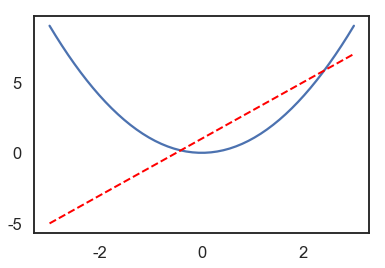

In [15]:
# 定义数据
x = np.linspace(-3, 3, 50)#x轴设置-3 到 3范围，从其中平均分配50个值赋值给x。
y1 = 2*x + 1 #定义一个函数y1
y2 = x**2 #定义一个函数y2
# 定义figure
plt.figure()
# 绘图(x,y2)
plt.plot(x, y2)
# 绘图(x,y1)
plt.plot(x,y1,color='red',linewidth=2.0, linestyle='--')
#--------------------- 

#linewidth=5#改变属性图外边框宽度

seaborn官方文档：https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot

seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
参数解释：
* 刻度值相关：
    
        x，y，hue：data或矢量数据中的变量名称，可选。三个值对应csv标中的列名称
        （三个变量的值可以直接是字符串，也就是列名；或者如csv.时间.values——csv是存储表格数据的变量名，时间是列名）。

        order，hue_order：字符串列表。按照列表中的顺序进行排列竖条。hue_order对应hue。

        data：DataFrame，数组或数组列表，可选。用于绘图的数据集。如果x和y不存在，则将其解释为宽格式。否则预计它将是长形的。

        estimator ：显示数值的方式。常见的有平均数、众数、中位数。
            示例：
            from numpy import median
            ax = sns.barplot(x="day", y="tip", data=tips, estimator=median)#使用中位数统计

        ci：float或“sd”或None。在估计值附近绘制置信区间的大小。如果是“sd”，则跳过自举并绘制观察的标准偏差。如果None，将不执行自举，并且不会绘制错误条。

        n_boot：int，可选。计算置信区间时使用的引导迭代次数。

        units ：变量名称data或矢量数据，可选。采样单元的标识符，用于执行多级引导程序并考虑重复测量设计。

        orient：“v”| “h”，可选。图的方向（垂直或水平）。这通常是从输入变量的dtype推断出来的，但可用于指定“分类”变量何时是数字或何时绘制宽格式数据。注意变化方向时X和Y的值要对调！

        errwidth：float。误差线（包括帽子）的高度。

        capsize：float。误差条上（和帽子）的宽度。

        ax：matplotlib轴。Axes对象将绘图绘制到，否则使用当前轴。（用于一张图上绘制多个坐标轴）

        Returns:	ax：matplotlib轴。返回Axes对象，并在其上绘制绘图。（不明白具体用途。。）



* 颜色相关：
       
      color：matplotlib颜色，可选。所有元素的颜色，或渐变调色板的种子。

      palette：调色板名称或叫颜色风格名称，列表或字典，可选。用于hue变量的不同级别的颜色。已知值："Blues_d"、"rocket"（渐变红）、"vlag"（蓝到红的渐变色）、"deep"（彩色、默认样式）

      saturation ：浮点数，可选。用于绘制颜色的原始饱和度的比例。对于稍微不饱和的颜色，大块贴片通常看起来更好，但1如果您希望绘图颜色与输入颜色规格完美匹配，则将其设置为 。

      errcolor：matplotlib颜色。表示置信区间的线条的颜色。

      dodge ：布尔，可选。使用色调嵌套时，是否应沿分类轴移动元素。

      kwargs：关键，价值映射。其他关键字参数在绘制时传递到plt.bar。

      alpha:浮点数。这里指的应该是深浅度。

    
* 另附上matplotlib与刻度相关的函数，应该不全。

    import matplotlib.pyplot as plt
        * 轴下标设置
        
            #设置Y轴下标的字体大小
            plt.yticks(fontsize=15)

            #设置X轴的各列下标字体的角度。（horizontal是水平的，vertical垂直，或者写60就是倾斜六十度角）
            plt.xticks(rotation='horizontal')

            #设置a到b的值，分成c个刻度.需要numpy库
            ticks = np.linspace(a,b,c)
            plt.yticks(ticks) / plt.xticks(ticks)#将ticks设置为X轴或Y轴的刻度

            #数组中设置每一个x或y轴刻度；2.对应上一个数组设置更换的内容。PS:如果有空格请输入“\”。
            plt.yticks/plt.xticks()
            例：plt.yticks([0,20,40,60],['a','b','c','d\e'])

            #设置x或y轴只显示a,b的刻度。（常用于刻度显示不全）
        plt.ylim((a,b))/plt.ylim((a,b))
        
        * 轴名称设置：
        
            #设置y轴、X轴的坐标名字与字体大小
            plt.ylabel('price_doc', fontsize=16)
            plt.xlabel('sub_area', fontsize=16)



    

* 其它常用设置相关文档参考：https://www.cnblogs.com/gczr/p/6767175.html

# 五、输出为图像
*函数：plt.savefig("路径")

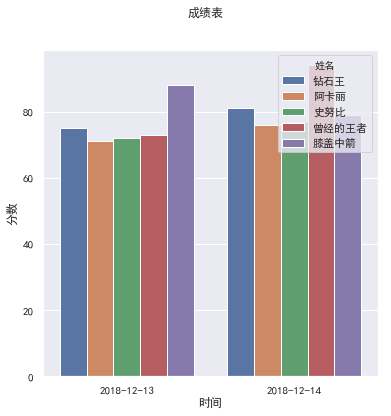

In [16]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')# 解决Seaborn中文显示问题

#设置画布大小
fig=plt.figure(figsize=(6,6))#figsize=(宽，高)
#加上大标题
fig.suptitle('成绩表',fontsize=12,fontweight='bold')


sns.barplot(x="时间",y='分数',hue='姓名',data=csv,)

plt.savefig("D:/temp.png")